<a href="https://colab.research.google.com/github/Saideepakvanga/ML/blob/main/customer_behavior_analysis_DA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting dataset into training & testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical data and scaling numerical data
from sklearn.ensemble import RandomForestClassifier  # A machine learning model for classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Load the dataset


In [ ]:
df.head()  # Display first 5 rows
df.isnull().sum()  # Check for missing values in each column
df.describe()  # Get summary statistics (mean, min, max, etc.)
df.info()  # Check column names, data types, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Drop the 'CustomerID' column as it is not relevant for modeling
df = df.drop(columns=['customerID'])


In [ ]:
print(df.isnull().sum())  # Check missing values


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Replace this line:
# df.fillna(df.mean(), inplace=True)

# With these lines:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

<ipython-input-28-5bea08f4b061>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


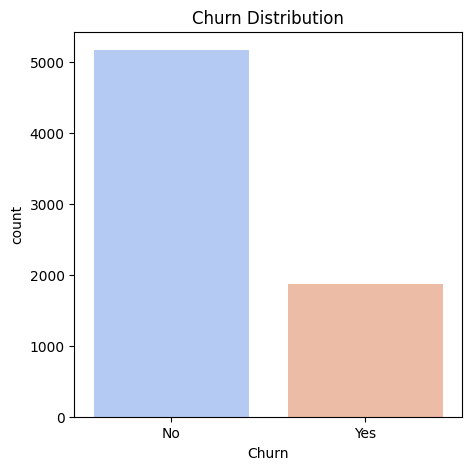

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()


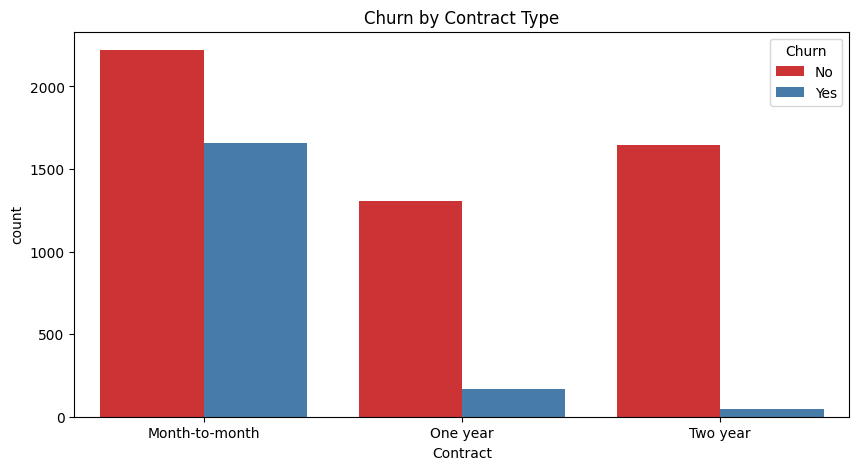

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set1")
plt.title("Churn by Contract Type")
plt.show()


In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [ ]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize all features except the target


<ipython-input-31-2bd6440ae3fe>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.00955867  0.99053183  0.99053183 ... -1.00955867  0.99053183
  0.99053183]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize all features except the target
<ipython-input-31-2bd6440ae3fe>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.43991649 -0.43991649 -0.43991649 ... -0.43991649  2.27315869
 -0.43991649]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize all features except the target
<ipython-input-31-2bd6440ae3fe>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1

In [ ]:
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7892122072391767


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



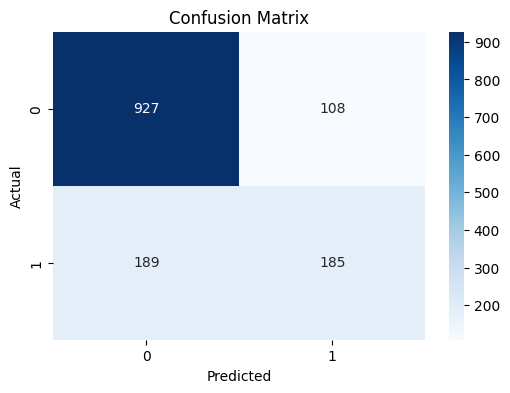

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
df.to_csv("cleaned_telecom_churn.csv", index=False)



In [ ]:
from google.colab import files
df.to_csv('customer_churn_cleaned.csv', index=False)
files.download('customer_churn_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>